In [1]:
import matplotlib.pyplot as plt
import scipy.io
import helper_functions as helper

# Change this to GPU or CPU depending on your machine
%run fista_spectral_cupy.py GPU

device =  GPU , using GPU and cupy


In [2]:
if device == 'GPU':
    import cupy as np
    np.cuda.Device(2).use()
else:
    import numpy as np

## Load in calibration data and image

In [9]:
loaded_mat = scipy.io.loadmat('SampleData/calibration.mat')
img = plt.imread('SampleData/meas_thordog.png')

In [10]:
mask, psf, img = helper.preprocess(loaded_mat['mask'], loaded_mat['psf'], img)

In [11]:
# Place variables on GPU if using GPU
if device == 'GPU': 
    mask = np.asarray(mask)
    psf = np.asarray(psf)
    img = np.asarray(img)
    

## Setup FISTA Algorithm

In [12]:
fista = fista_spectral_numpy(psf, mask[:,:,0:-1])

In [13]:
fista.iters = 500

# Default: tv, Options: 'native' for native sparsity, 'non-neg' for enforcing non-negativity only
fista.prox_method = 'tv'  
fista.tv_lambda  = .003
fista.tv_lambdaw = 0.01 
fista.lowrank_lambda = 0.00005

iteration:  0  loss:  1310.1492102913764


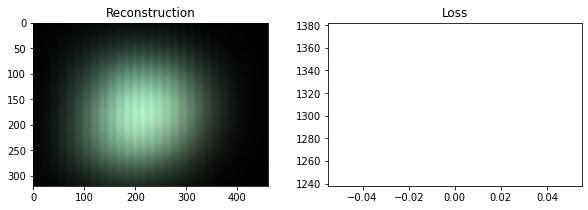

iteration:  20  loss:  125.66325256474964


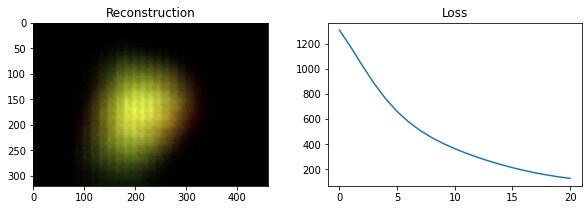

iteration:  40  loss:  40.56946260103729


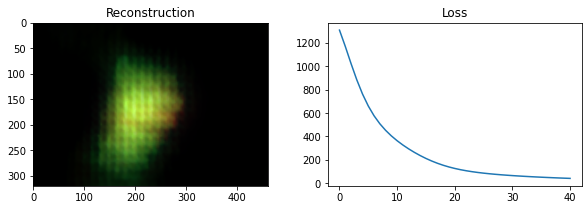

iteration:  60  loss:  21.29663220886572


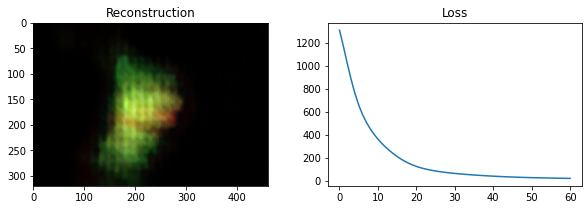

iteration:  80  loss:  14.017819030241347


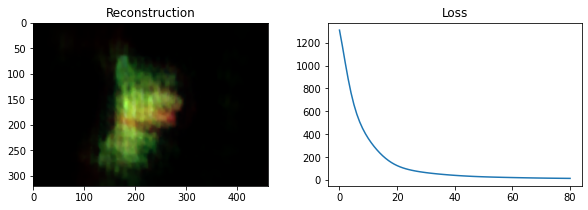

iteration:  100  loss:  10.79851183638281


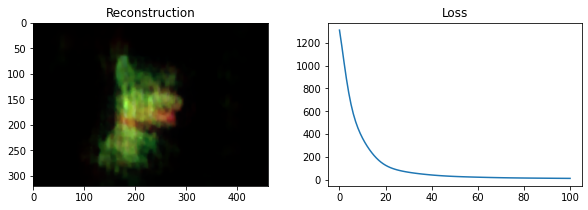

iteration:  120  loss:  9.282808669983977


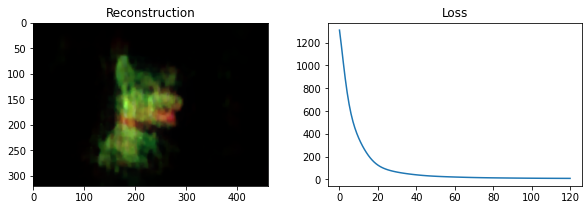

iteration:  140  loss:  8.48564717486143


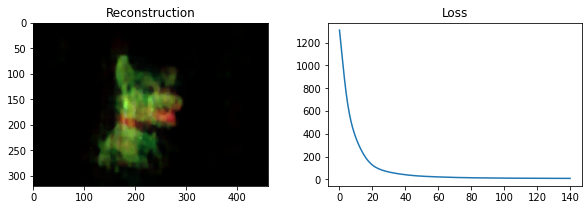

iteration:  160  loss:  7.8814520712725225


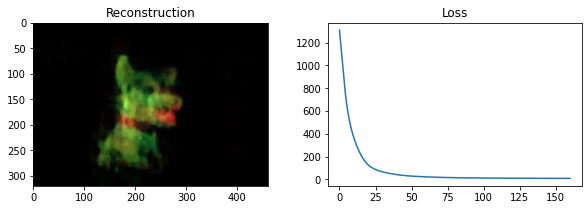

iteration:  180  loss:  7.409573458679035


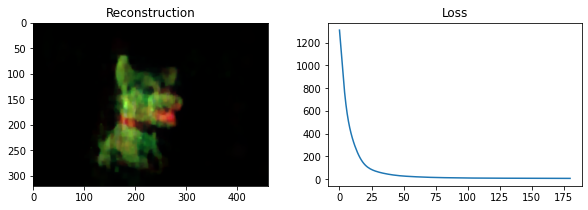

iteration:  200  loss:  7.049181237063243


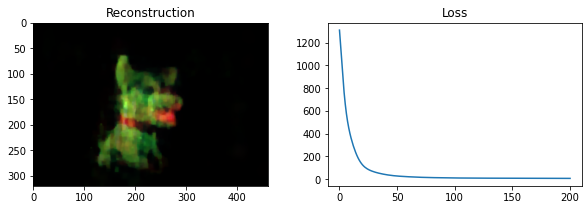

iteration:  220  loss:  6.795222967047661


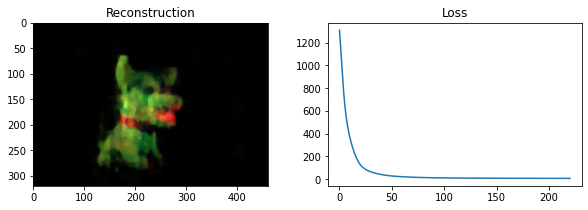

iteration:  240  loss:  6.595660699304593


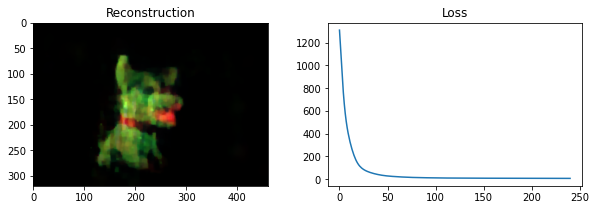

iteration:  260  loss:  6.424520935243148


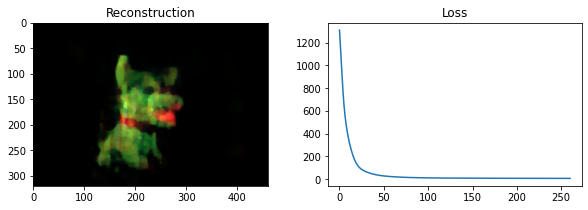

iteration:  280  loss:  6.276915968370014


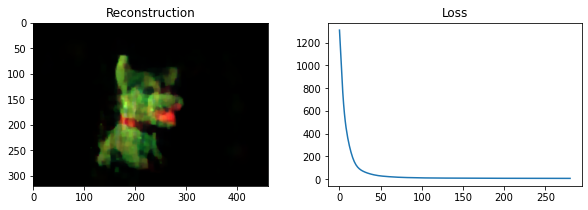

iteration:  300  loss:  6.156057402069104


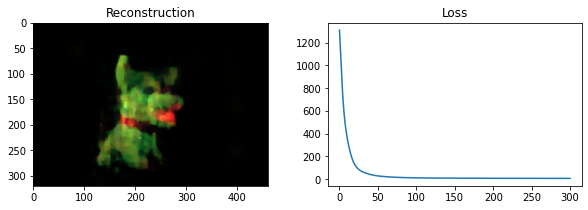

iteration:  320  loss:  6.062861486251231


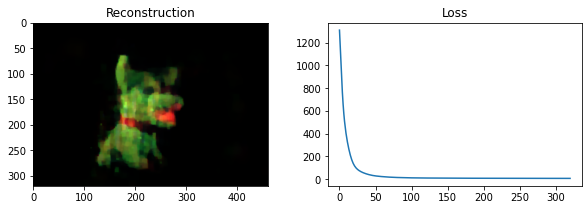

iteration:  340  loss:  5.991171891965877


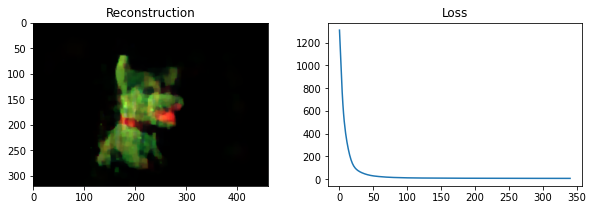

iteration:  360  loss:  5.931574097646528


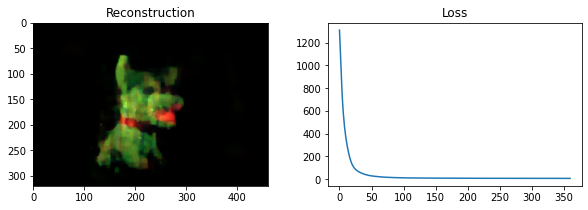

iteration:  380  loss:  5.879037987306321


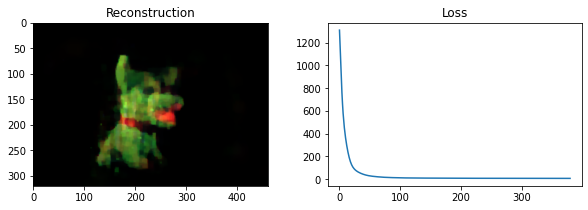

iteration:  400  loss:  5.832963970404148


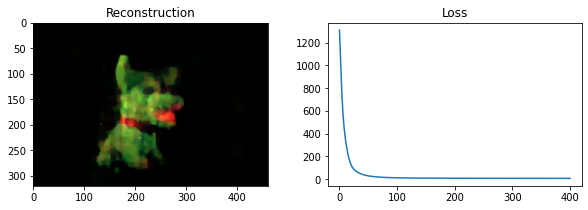

iteration:  420  loss:  5.793926218449593


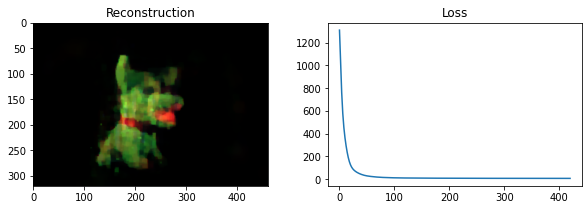

iteration:  440  loss:  5.761129428968084


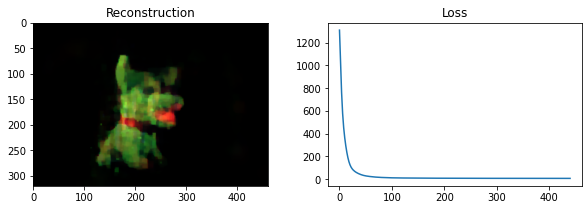

iteration:  460  loss:  5.732988150628741


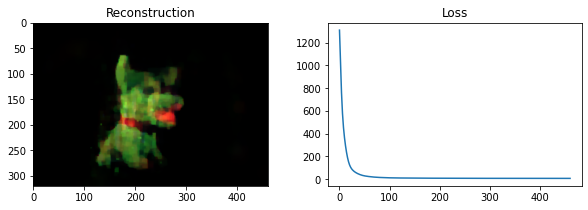

iteration:  480  loss:  5.708018385739579


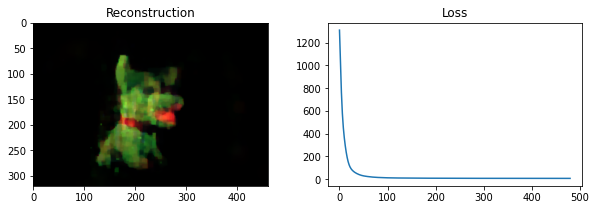

In [14]:
out_img = fista.run(img)

In [18]:
out_img = fista.out_img
fc_img = helper.pre_plot(helper.stack_rgb_opt(out_img))


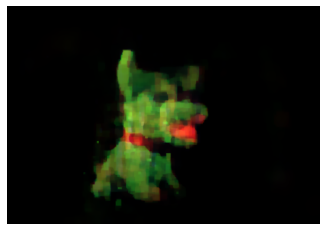

In [19]:
plt.imshow(fc_img); plt.axis('off');

In [20]:
helper.plt3D(helper.pre_plot(out_img))

interactive(children=(IntSlider(value=1, description='r', max=63), Output()), _dom_classes=('widget-interact',…